In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  
pd.set_option('display.max_columns', 200)

In [138]:
orig_df = pd.read_csv('/kaggle/input/cis-ieee-unb-churn/df_train.csv')

In [139]:
orig_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,3038-PQIUY,1,United States,California,Dulzura,91917,"32.622999, -116.687855",32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
2,1468-DEFNC,1,United States,California,San Jose,95130,"37.277592, -121.986477",37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,6437-UDQJM,1,United States,California,Los Angeles,90023,"34.017697, -118.200577",34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,9490-DFPMD,1,United States,California,Tahoma,96142,"39.061227, -120.179546",39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871


In [140]:
orig_df.shape

(5986, 30)

In [141]:
orig_df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'CLTV'],
      dtype='object')

In [142]:
df = orig_df[['Zip Code',
        'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'CLTV']].copy()

In [143]:
df.head()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,90001,33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,91917,32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
2,95130,37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,90023,34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,96142,39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871


In [153]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Internet Service', 'Contract', 'Payment Method'], dtype='object')

In [145]:
df['Internet Service'].value_counts()

Internet Service
Fiber optic    2608
DSL            2060
No             1318
Name: count, dtype: int64

In [146]:
df[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges','Churn Label']].describe()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5579,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3043,5013,3075,4597,5401,2894,2608,2972,2624,2612,2925,2394,2347,3285,3536,1982,11,4409


In [147]:
for column in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing','Churn Label']:
    df[column] = df[column].apply(lambda x: x == 'Yes')



In [148]:
df['Total Charges'] = df['Total Charges'].str.replace(' ','0').astype(float)

In [157]:
#df[['Gender', 'Internet Service', 'Contract', 'Payment Method']].describe()

KeyError: "None of [Index(['Gender', 'Internet Service', 'Contract', 'Payment Method'], dtype='object')] are in the [columns]"

In [155]:
df = pd.get_dummies(df, columns=['Gender', 'Internet Service', 'Contract', 'Payment Method'])

In [200]:
df.shape

(5986, 32)

In [156]:
df.dtypes

Zip Code                                      int64
Latitude                                    float64
Longitude                                   float64
Senior Citizen                                 bool
Partner                                        bool
Dependents                                     bool
Tenure Months                                 int64
Phone Service                                  bool
Multiple Lines                                 bool
Online Security                                bool
Online Backup                                  bool
Device Protection                              bool
Tech Support                                   bool
Streaming TV                                   bool
Streaming Movies                               bool
Paperless Billing                              bool
Monthly Charges                             float64
Total Charges                               float64
Churn Label                                    bool
CLTV        

### Outliars

<Axes: ylabel='Density'>

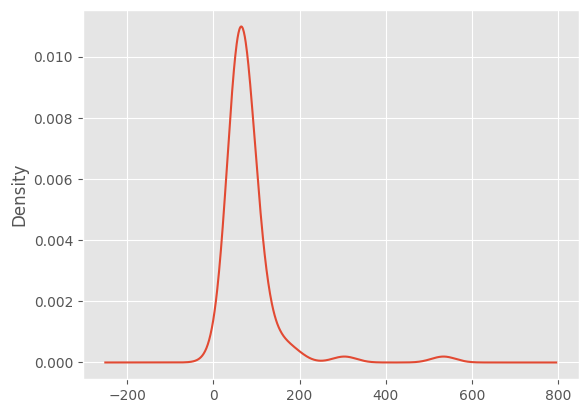

In [165]:
df['Tenure Months'].value_counts().plot(kind = 'kde')

In [167]:
df.select_dtypes(include=['bool']).columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Churn Label', 'Gender_Female', 'Gender_Male',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [173]:
df_corr = df[['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Churn Label']].corr()

df_corr

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Churn Label
Senior Citizen,1.000000,0.014340,-0.174596,0.004711,0.141791,-0.032836,0.069471,0.063700,-0.062109,0.105763,0.118701,0.158606,0.148699
Partner,0.014340,1.000000,0.366220,0.019682,0.142162,0.138878,0.139560,0.150038,0.118727,0.132323,0.118193,-0.014657,-0.153951
Dependents,-0.174596,0.366220,1.000000,0.011653,-0.028658,0.044313,0.000590,-0.029232,0.026613,-0.053538,-0.074374,-0.118713,-0.247891
Phone Service,0.004711,0.019682,0.011653,1.000000,0.279377,-0.090206,-0.048931,-0.071167,-0.097407,-0.025230,-0.033685,0.010945,0.014198
Multiple Lines,0.141791,0.142162,-0.028658,0.279377,1.000000,0.107979,0.199901,0.192472,0.103610,0.261354,0.260568,0.157069,0.044227
Online Security,-0.032836,0.138878,0.044313,-0.090206,0.107979,1.000000,0.285262,0.278304,0.350210,0.180808,0.190523,-0.001393,-0.173209
Online Backup,0.069471,0.139560,0.000590,-0.048931,0.199901,0.285262,1.000000,0.302648,0.296864,0.283448,0.282321,0.124369,-0.073967
Device Protection,0.063700,0.150038,-0.029232,-0.071167,0.192472,0.278304,0.302648,1.000000,0.337881,0.387020,0.399867,0.097659,-0.061214
Tech Support,-0.062109,0.118727,0.026613,-0.097407,0.103610,0.350210,0.296864,0.337881,1.000000,0.277182,0.274088,0.037684,-0.164608
Streaming TV,0.105763,0.132323,-0.053538,-0.025230,0.261354,0.180808,0.283448,0.387020,0.277182,1.000000,0.534960,0.216105,0.060883


In [179]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [277]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[817  72]
 [174 135]]
              precision    recall  f1-score   support

       False       0.82      0.92      0.87       889
        True       0.65      0.44      0.52       309

    accuracy                           0.79      1198
   macro avg       0.74      0.68      0.70      1198
weighted avg       0.78      0.79      0.78      1198



In [278]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [279]:
y_pred_rf = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



[[815  74]
 [156 153]]
              precision    recall  f1-score   support

       False       0.84      0.92      0.88       889
        True       0.67      0.50      0.57       309

    accuracy                           0.81      1198
   macro avg       0.76      0.71      0.72      1198
weighted avg       0.80      0.81      0.80      1198



In [283]:
orig_df_test = pd.read_csv('/kaggle/input/cis-ieee-unb-churn/df_test.csv')

In [284]:
df_test = orig_df_test[['Zip Code',
        'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'CLTV']].copy()

In [285]:
for column in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing']:
    df_test[column] = df_test[column].apply(lambda x: x == 'Yes')



In [286]:
df_test = pd.get_dummies(df_test, columns=['Gender', 'Internet Service', 'Contract', 'Payment Method'])

In [287]:
df_test

,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,CLTV,Gender_Female,Gender_Male,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,93531,35.214982,-118.590490,False,False,False,15,True,False,False,True,False,False,False,True,True,85.90,1269.55,3579,True,False,False,True,False,True,False,False,True,False,False,False
1,95207,38.002125,-121.324979,False,True,False,18,True,True,False,True,False,False,False,False,False,56.80,1074.65,5558,False,True,True,False,False,True,False,False,False,True,False,False
2,94579,37.687264,-122.157280,False,False,False,2,True,False,False,False,False,False,False,False,True,20.00,40.90,2237,True,False,False,False,True,True,False,False,False,False,False,True
3,91423,34.146957,-118.432138,True,True,False,6,True,False,False,True,False,False,False,True,True,84.20,519.15,5834,False,True,False,True,False,True,False,False,False,False,True,False
4,92563,33.581045,-117.147190,False,False,False,40,True,True,False,False,True,True,True,True,False,104.80,4131.95,3492,False,True,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,95970,39.424957,-122.039307,False,True,False,60,True,True,False,True,True,True,True,True,True,110.80,6640.70,5942,True,False,False,True,False,False,False,True,False,True,False,False
1053,92104,32.741499,-117.127409,True,True,False,27,True,False,True,False,True,False,True,True,True,101.25,2754.45,4853,True,False,False,True,False,True,False,False,False,False,True,False
1054,94110,37.750021,-122.415201,False,True,True,72,True,True,True,False,True,False,True,True,True,106.10,7848.50,6283,False,True,False,True,False,False,True,False,True,False,False,False
1055,93624,36.397745,-120.119911,False,False,False,62,True,True,False,False,True,False,True,True,True,96.75,6125.40,5016,False,True,False,True,False,False,True,False,False,False,True,False


In [288]:
predictions = model_rf.predict(df_test)
predictions = ['Yes' if pred else 'No' for pred in predictions]

In [289]:
orig_df_test['Churn Label'] = predictions

In [290]:
result_df = orig_df_test[['CustomerID', 'Churn Label']]

In [291]:
result_df

,CustomerID,Churn Label
0,2189-WWOEW,Yes
1,2446-ZKVAF,No
2,4986-MXSFP,No
3,5868-YWPDW,Yes
4,9412-GHEEC,No
...,...,...
1052,9330-VOFSZ,No
1053,0886-QGENL,No
1054,3865-YIOTT,No
1055,3009-JWMPU,No


In [292]:
result_df.to_csv('predictions.csv', index=False)


In [293]:
import os
print(os.path.isfile('/kaggle/working/predictions.csv'))

True


In [294]:
result_df

,CustomerID,Churn Label
0,2189-WWOEW,Yes
1,2446-ZKVAF,No
2,4986-MXSFP,No
3,5868-YWPDW,Yes
4,9412-GHEEC,No
...,...,...
1052,9330-VOFSZ,No
1053,0886-QGENL,No
1054,3865-YIOTT,No
1055,3009-JWMPU,No
